In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm 
plt.rcParams["font.family"] = "Times New Roman"

In [83]:
algo = 'probit' # algorithm: 'probit' or 'logit'
ib = 100 # imbalance factor: 60 or 100

In [84]:
all_n = list(os.walk(algo + '/ib_' + str(ib) + '/'))[0][1]
data = pd.DataFrame()
for n in tqdm(all_n):
    all_d = list(os.walk(algo + '/ib_' + str(ib) + '/' + n + '/'))[0][1]
    n=n[2:]
    for d in all_d:
        d=d[2:]
        t_list=[]
        count = 0
        for lp in range(1,101):
            try:
                temp=np.load(algo + '/ib_' + str(ib) + '/n_' + n + '/d_' + d + '/tauto_'+algo+'_ib'+str(ib)+'_n' + n + '_d' + d + '_' + str(lp) + '.npy', allow_pickle=True) 
                t_list.append(temp.item()['t_auto'])
                count+=1     
            except:
                continue
        plt.figure()
        plt.hist(t_list)
        plt.savefig('plot_check/' + algo + str(ib) +'_n' + n + '_d' + d + '.png')   
        plt.close()
        data=pd.concat([data, pd.DataFrame({'n':n, 'd':d, 't':np.mean(t_list), 'count':count},index=[0])])
data=data.reset_index(drop=True)

100%|██████████| 20/20 [00:03<00:00,  6.21it/s]


In [85]:
data

,n,d,t,count
0,500,850,213.855542,100
1,500,250,291.543912,100
2,500,400,291.039279,100
3,500,650,262.934170,100
4,500,900,219.279441,100
5,500,300,289.739548,100
6,500,150,261.207935,100
7,500,550,255.726954,100
8,500,700,251.663759,100
9,500,200,282.813996,100


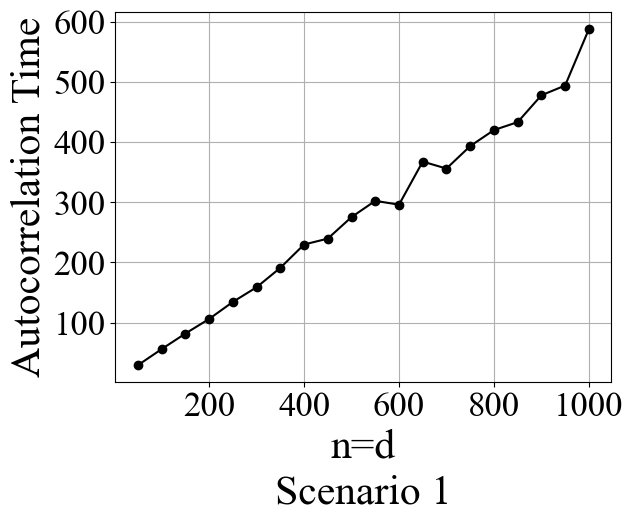

In [86]:
#probit n=d
temp = data[data.n==data.d][['n','t']]
temp.n = temp.n.map(lambda x: int(x))
temp = temp.sort_values('n')
plt.plot(temp.n, temp.t, '-o', color='black')
plt.grid()
plt.ylabel('Autocorrelation Time',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('n=d',fontsize=30)
plt.title('Scenario 1', y=-0.35, fontsize = 30)
plt.savefig("plot/"+algo+str(ib)+"_1.png", dpi=300, bbox_inches='tight')

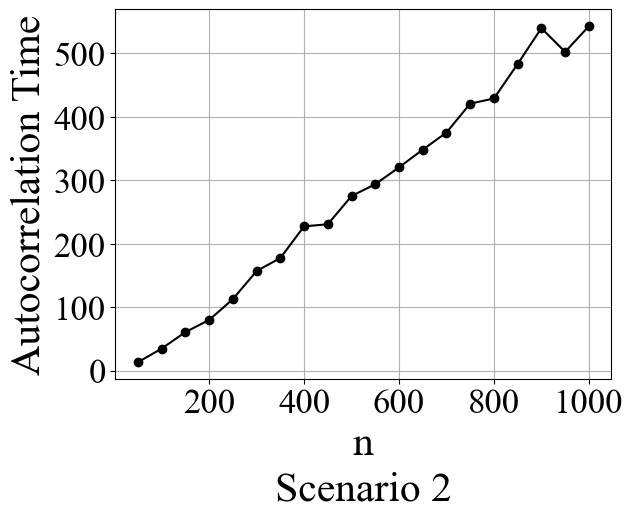

In [87]:
#probit n=d
temp = data[data.d=='500'][['n','t']]
temp.n = temp.n.map(lambda x: int(x))
temp = temp.sort_values('n')
plt.plot(temp.n, temp.t, '-o',color='black')
plt.grid()
plt.ylabel('Autocorrelation Time',fontsize=30)
plt.xlabel('n',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Scenario 2', y=-0.35, fontsize=30)
plt.savefig("plot/"+algo+str(ib)+"_2.png", dpi=300, bbox_inches='tight')

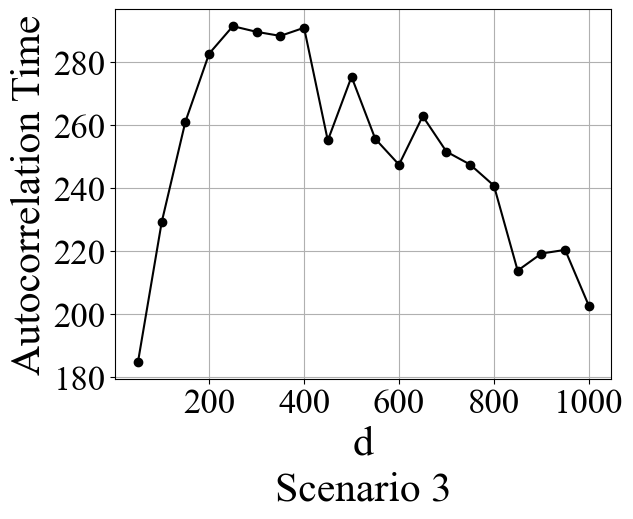

In [88]:
temp = data[data.n=='500'][['d','t']]
temp.d = temp.d.map(lambda x: int(x))
temp = temp.sort_values('d')
plt.plot(temp.d, temp.t, '-o',color='black')
plt.grid()
plt.ylabel('Autocorrelation Time', fontsize=30)
plt.xlabel('d', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Scenario 3', y=-0.35, fontsize=30)
plt.savefig("plot/"+algo+str(ib)+"_3.png", dpi=300, bbox_inches='tight')